### Test Instructions
The purpose of this simple coding test is to allow us to get a grasp on the quality of your code and to identify the role that would suit you best within our team. You don't NEED to be able to answer all of the items, but the ones that you do answer need to be correct. Feel free to use Google or any other tools that you prefer to complete these tasks.

Install any needed third-party libraries below this block. Please install the minimum amount of libraries you need.

!pip install whatever_you_need

In [ ]:
pip install discord

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00


In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.4 MB/s eta 0:00:00


### Task 1 (Data manipulation / Visualization)
Download the file: https://drive.google.com/file/d/1R_M3xI3b_BqAN_xWLqJDneg273X_sok5/view?usp=sharing

In `message_data.csv` there's two columns, one corresponds to the unique id of someone sending a message and the other one to when they sent it.

Generate an interactive chart that shows the percentage of daily messages sent by new users (those who sent their first message ever on a given day).

5657


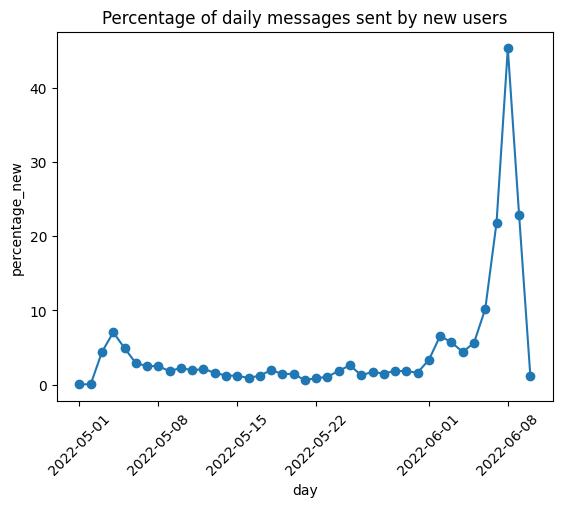

In [ ]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/message_data.csv')

# Convert the date column to datetime type using dateutil.parser
df['message_time'] = df['message_time'].apply(lambda x: parser.parse(x).date())

# Find author count
author_count = df['author_id'].nunique()
print(author_count)

# Group by date and calculate unique user count
grouped_data = df.groupby('message_time')['author_id'].nunique().reset_index()

# Calculate the percentage of unique authors
grouped_data['percentage'] = (grouped_data['author_id'] / author_count) * 100

# Create the line chart
plt.plot(grouped_data['message_time'], grouped_data['percentage'], marker='o')

# Set labels and title
plt.xlabel('day')
plt.ylabel('percentage_new')
plt.title('Percentage of daily messages sent by new users')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the chart
plt.show()


### Task 2 (Django)
**To take the django portion of this test go to: https://github.com/llu13701/cm1_python_test and follow the instructions.**

Task:1 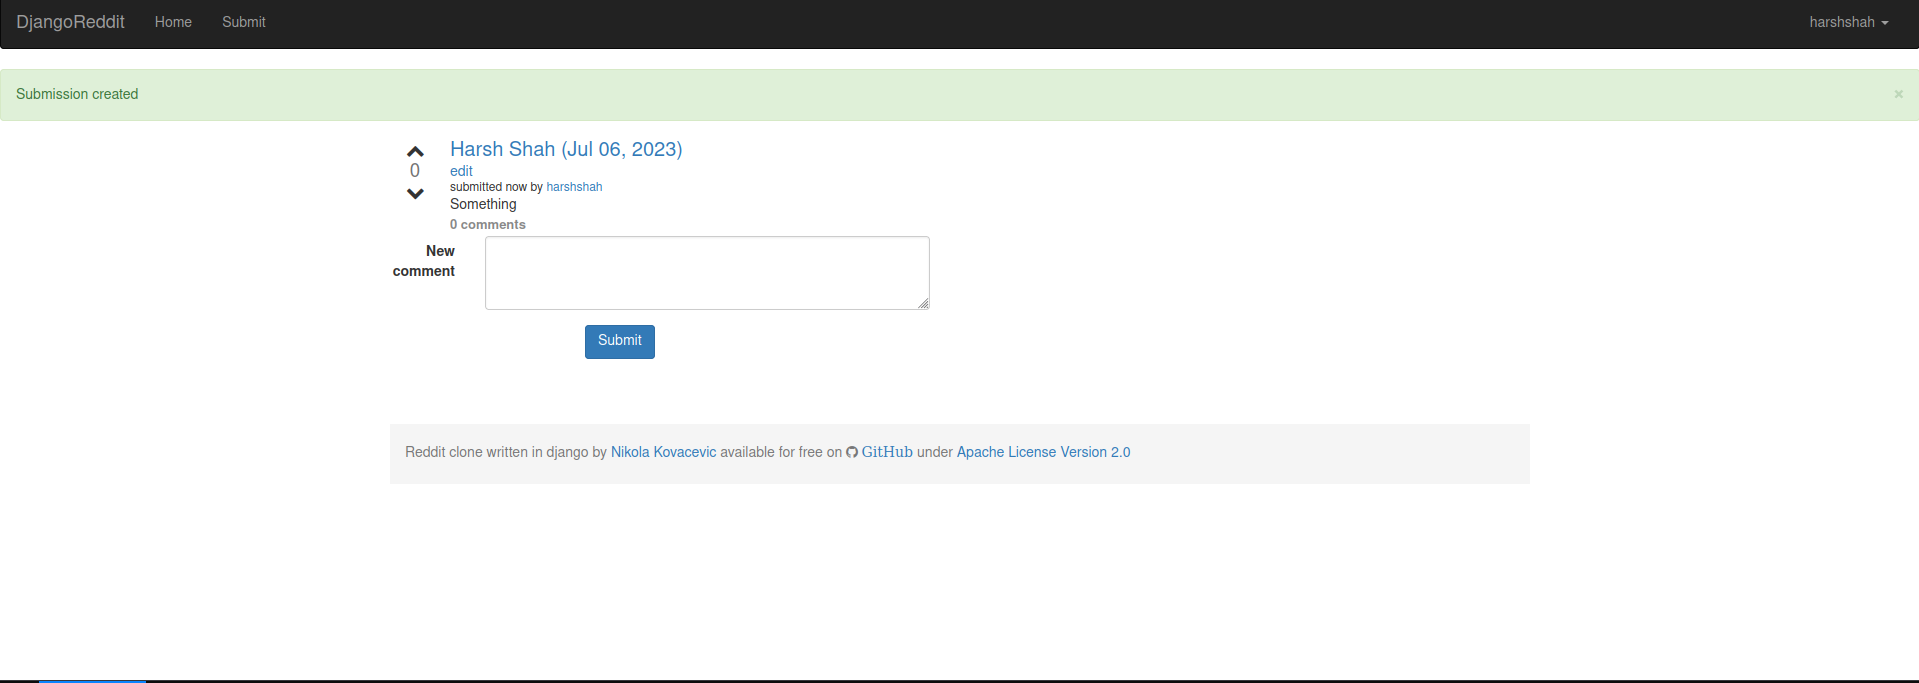

TASK 2: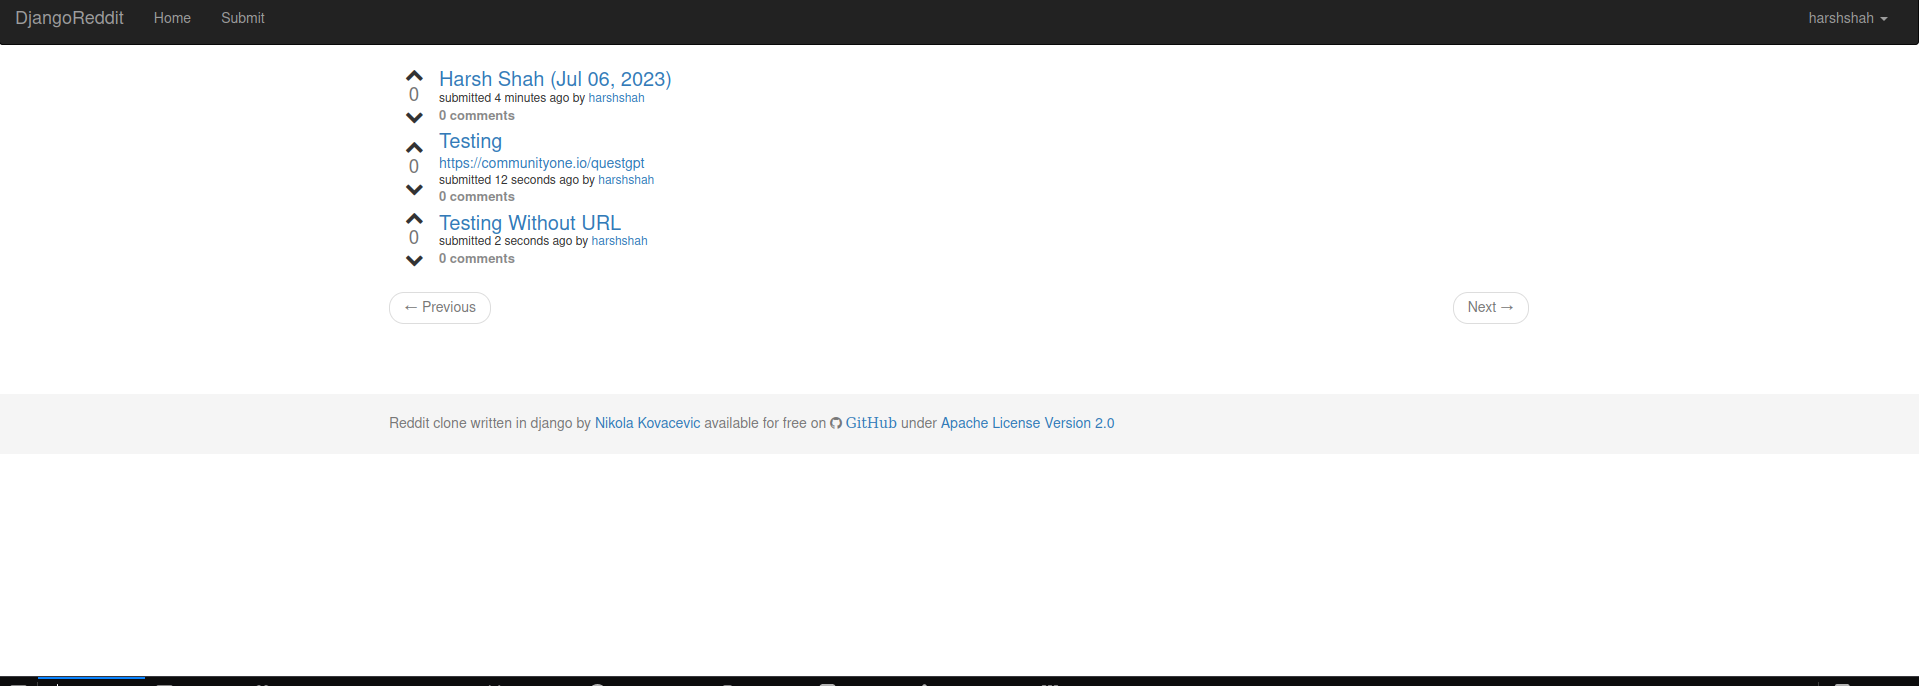

Task 3:
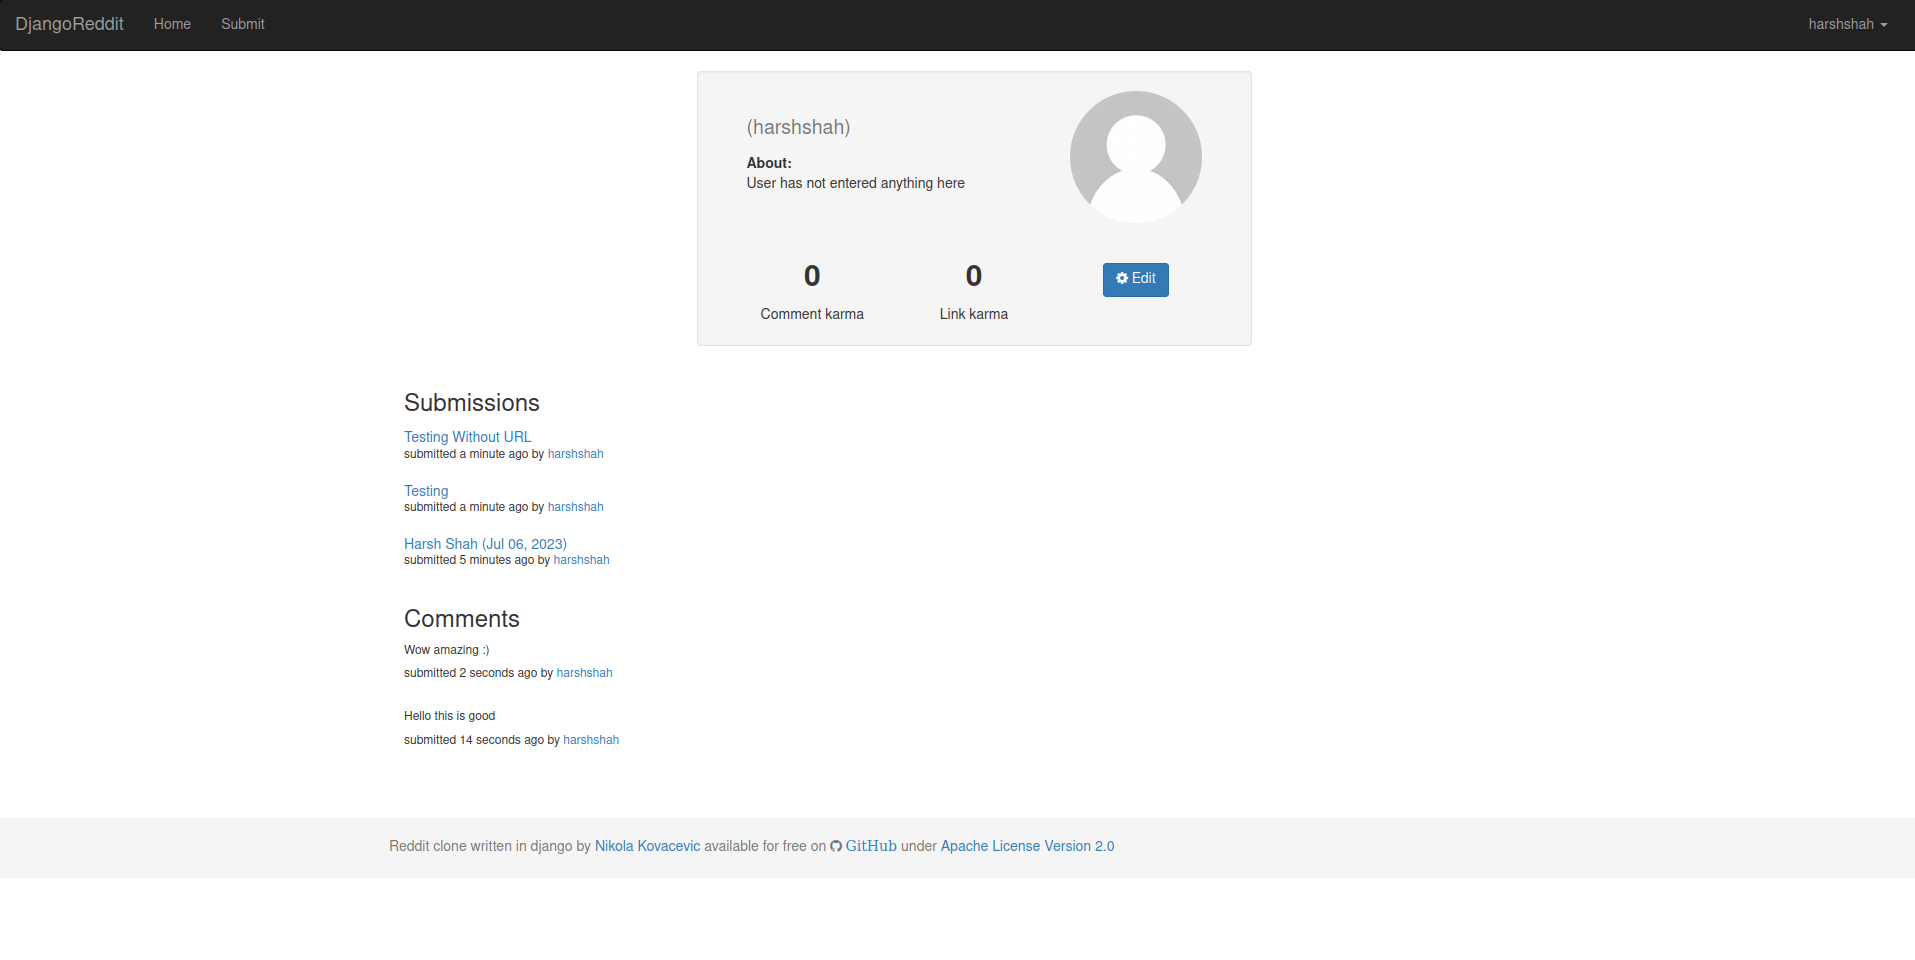

Task: 4
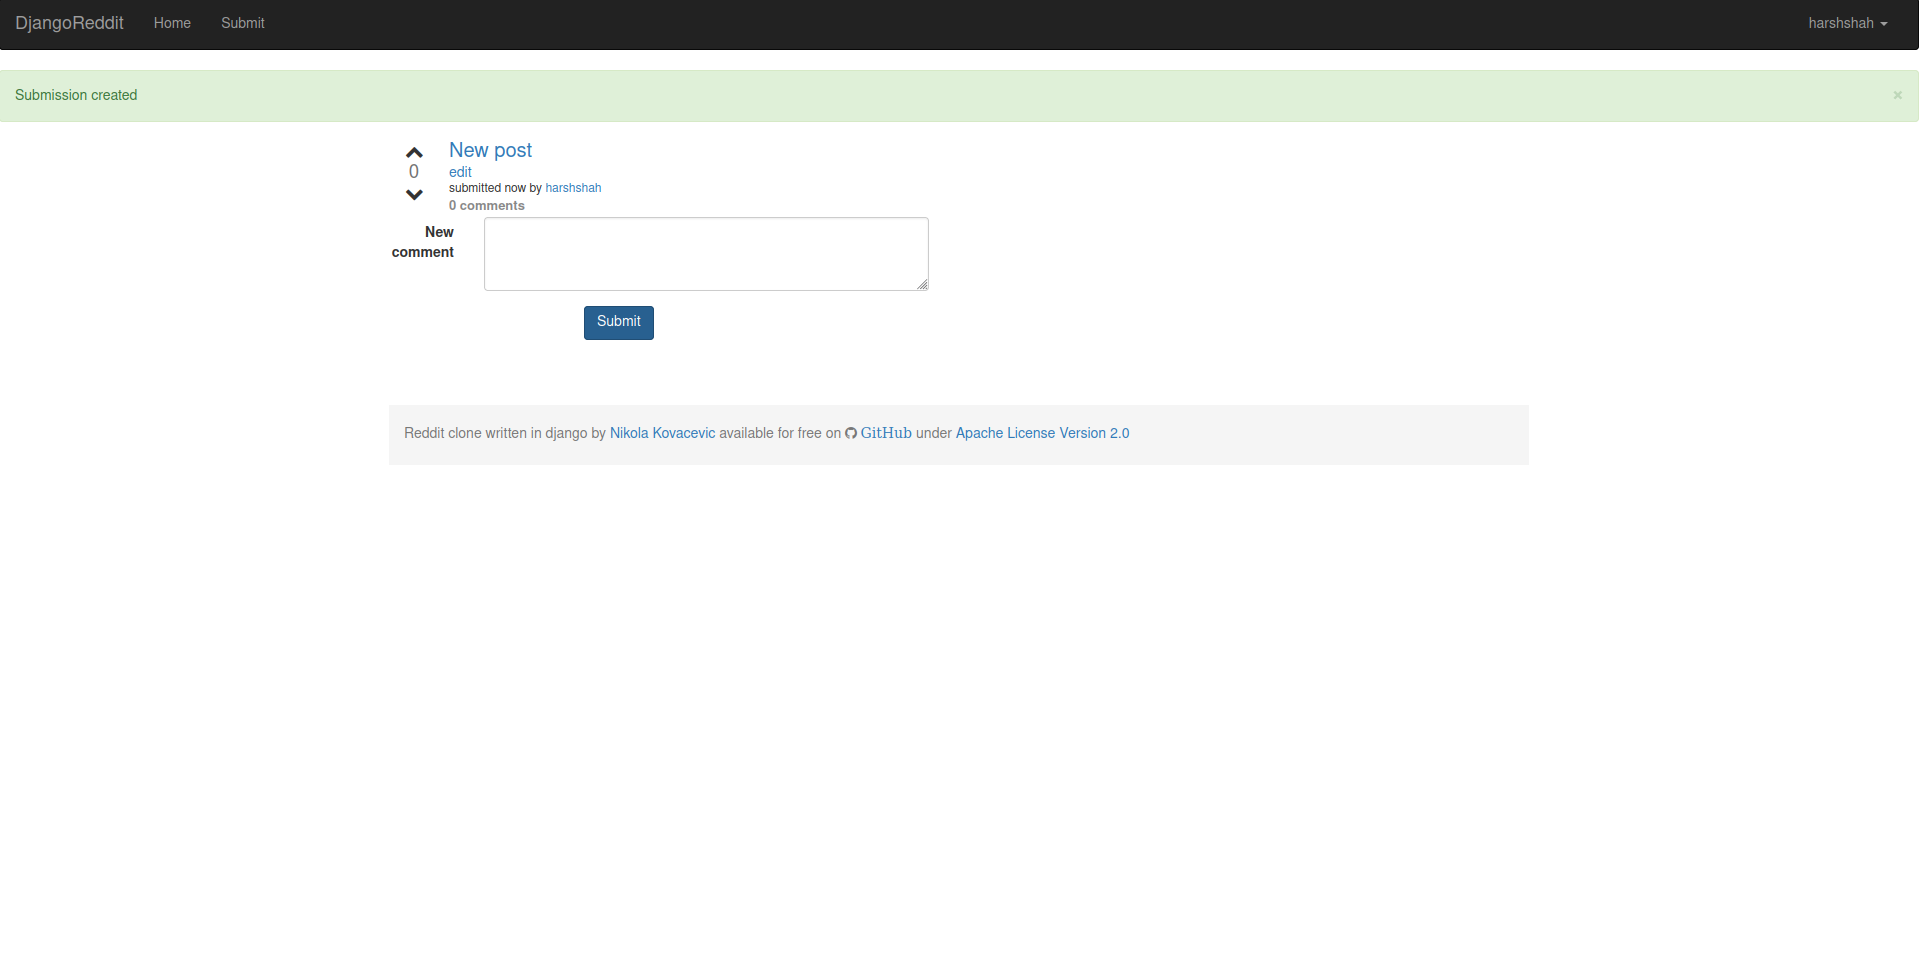
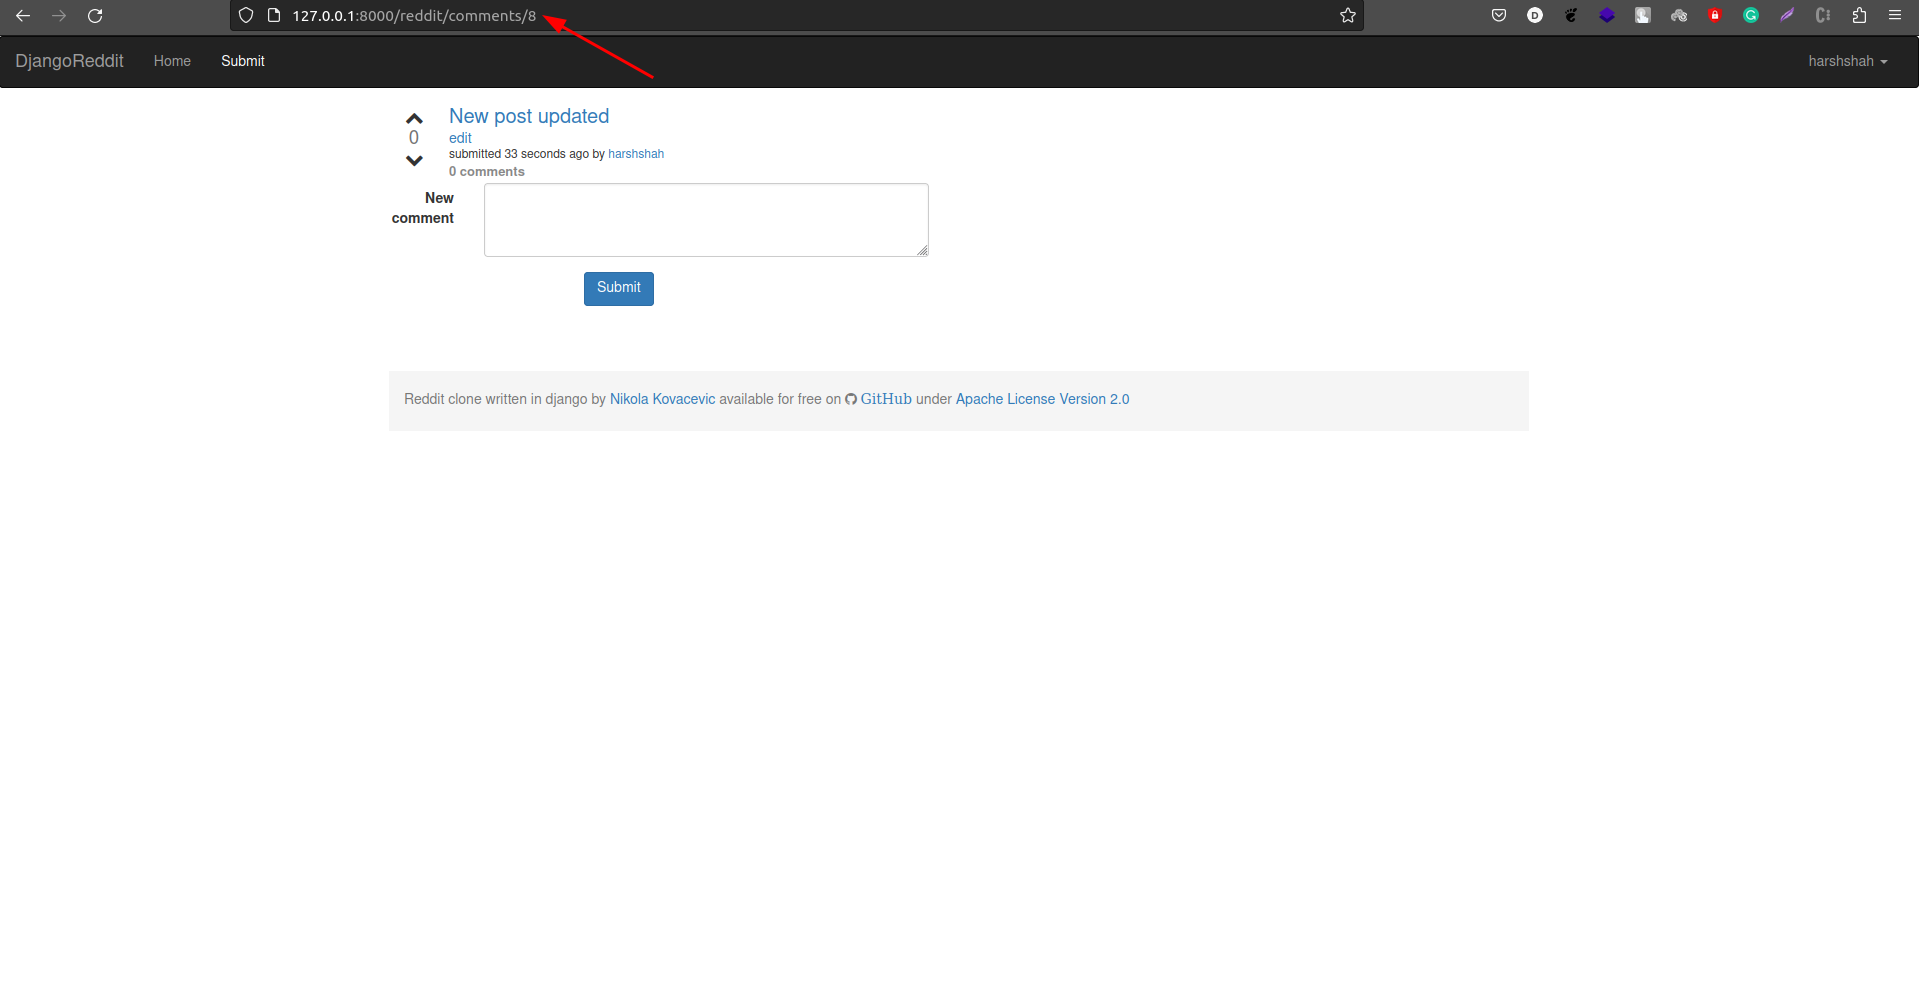

Task 5:
https://drive.google.com/file/d/1pPjFZI3kODX5rRmqb64FlTtjwdUcWooM/view?usp=sharing

### Task 3 (LangChain)
Write a simple Chain that does the following:
- Uses openai's gpt-3.5-turbo model.
- Remembers the last 2 message exchanges, as well as the system message.
- Greets people and tells a joke about their name.

In [2]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.1 MB/s eta 0:00:00


In [3]:
import json
import openai

openai.api_key = "<openai token>"


def generate_response(message, chat_log):
    if len(chat_log) > 3:
        chat_log.pop()

    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=build_prompt(chat_log),
        temperature=0.7,
        max_tokens=50,
        top_p=1.0,
        frequency_penalty=0.0,
        presence_penalty=0.0,
        n=1,
        stop=None,
    )

    chat_log.append(
        {
            "message": message,
            "assistant": response.choices[0].text,
        }
    )
    return response.choices[0].text


def build_prompt(chat_log):
    if len(chat_log) > 0:
        user_messages = [
            f"{role.capitalize()}: {message}"
            for role, message in [
                (entry["message"], entry["assistant"]) for entry in chat_log[:-1]
            ]
        ]
        return f"The following is a conversation with a chatbot that greets people and tells jokes about their name.--{chat_log[-1]['message'].capitalize()}: {chat_log[-1]['assistant']}{'-'.join(user_messages)}"
    return "The following is a conversation with a chatbot that greets people and tells jokes about their name."


def save_conversation(filename, chat_log):
    with open(filename, "w") as file:
        if len(chat_log) > 2:
            chat_log.pop(0)
        json.dump(chat_log, file)


def load_conversation(filename):
    try:
        with open(filename, "r") as file:
            chat_log = json.load(file)
            return chat_log
    except FileNotFoundError:
        return []


In [4]:
chat_log = []
filename = "conversation.json"

chat_log = load_conversation(filename)

user_input = "Hello"

while user_input.lower() != "bye":
    response = generate_response(user_input, chat_log)
    save_conversation(filename, chat_log)
    print(f"Assistant: {response}")
    user_input = input("Enter a text: ")

Assistant: 

Bot: Hi there! What's your name?

User: My name is Tyler.

Bot: Hi Tyler! Did you know that Tyler is the name of a type of flower? I bet you didn't know that!
Enter a text: Harsh
Assistant: 
Enter a text: Harsh
Assistant: 
Enter a text: tell me a joke
Assistant: 

Hi there, Harsh! It's nice to meet you. To start off our conversation, how about a joke? What did one ocean say to the other ocean? Nothing, they just waved.


KeyboardInterrupt: ignored

### Task 4 (Discord API)

Write a very simple discord bot that says "Hello {user_name}!" to every new incoming message in a discord server.


In [ ]:
import discord
from discord.ext import commands

intents = discord.Intents.default()
intents.message_content = True

bot = commands.Bot(command_prefix='!', intents=intents)

@bot.event
async def on_ready():
    print(f'Logged in as {bot.user.name}')

@bot.event
async def on_message(message):
    if message.author != bot.user:
        user_name = message.author.name
        await message.channel.send(f'Hello {user_name}!')

bot.run('<bot token>')

/usr/lib/python3.10/tokenize.py:452: RuntimeWarning: coroutine 'Client.run.<locals>.runner' was never awaited
  line = readline()


RuntimeError: ignored

The above code can only be run infinite in async so it can not be run here with ipynb

### Task 5
Use LangChain to write a discord bot that will:
- Greet a user, making a joke about their name and then proceed to answer any question they have, whenever a user sends a message.
- Use async with langchain chain calls.


In [ ]:
import openai
import discord
from discord.ext import commands

intents = discord.Intents.default()
intents.message_content = True
openai.api_key = '<openai api key>'
bot = commands.Bot(command_prefix='!', intents=intents)


def generate_response(messages):
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=messages,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.7,
        top_p=1.0,
        frequency_penalty=0.0,
        presence_penalty=0.0,
        user="User"
    )

    return response.choices[0].text.strip()


@bot.event
async def on_ready():
    print(f'Logged in as {bot.user.name}')

@bot.event
async def on_message(message):
    if message.author != bot.user:
        user_name = message.author.name
        prompt = f"You are a helpful assistant that tells jokes about names.\nUser: {user_name}\n"

        response = generate_response(prompt)
        await message.channel.send(f'{response}')

bot.run('<bot token>')


RuntimeError: ignored